In [1]:
import numpy as np
import anndata as ad
import scanpy as sc
from rosa.preprocessing import (
    clean_cells_genes,
)

RAW_ADATA_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features.h5ad"
EMBEDS_ADATA_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features_with_embeds_new_norm.h5ad"


Global seed set to 0
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
adata = ad.read_h5ad(EMBEDS_ADATA_PT)

In [3]:
adata.layers['counts'].sum(axis=1)

array([  31101.303 ,   47577.56  ,   25631.703 ,    4873.636 ,
         29753.188 ,  104549.64  ,   36907.395 ,   91035.06  ,
         36060.695 ,   17699.865 ,   62429.656 ,   21024.836 ,
         55504.652 ,   62199.973 ,   27912.717 ,   46981.285 ,
         19863.58  ,  128178.68  ,   82672.086 ,   23689.19  ,
         15469.399 ,   23657.637 ,   14648.33  ,   14914.962 ,
         31258.973 ,    9448.694 ,  163305.42  ,  114351.664 ,
         11598.449 ,   45369.07  ,   77246.16  ,   86936.35  ,
         42199.812 ,   60885.945 ,   44861.72  ,   67409.75  ,
         26624.922 ,   38554.36  ,  154319.92  ,   66116.37  ,
         43326.223 ,   42287.355 ,   46676.957 ,   15353.082 ,
          8753.412 ,   25017.225 ,   84764.18  ,   34986.45  ,
         70529.984 ,  132114.86  ,  109430.85  ,  133121.16  ,
         33242.67  ,   18465.832 ,   88491.17  ,    7748.495 ,
         14535.782 ,   14069.076 ,   28994.896 ,   32987.203 ,
         40043.438 ,    9910.199 ,   13930.123 ,   8436

In [4]:
adata.layers['counts_normalized'] = adata.layers['counts'].copy()
sc.pp.normalize_total(adata, target_sum=1e5, layer='counts_normalized')

In [5]:
import matplotlib.pyplot as plt

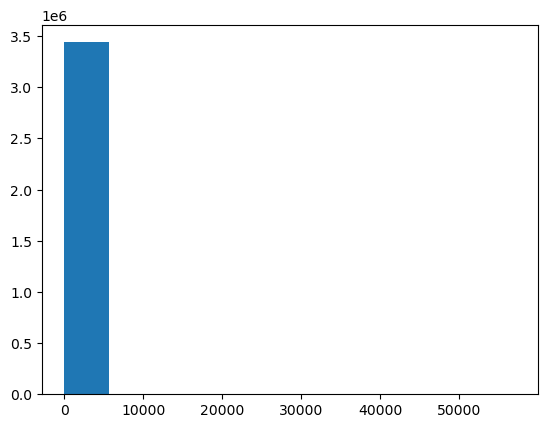

In [7]:
plt.hist(adata.layers['counts_normalized'].flatten());

In [24]:
from rosa.preprocessing import bin_expression, reconstruct_expression

ImportError: cannot import name 'bin_expression' from 'rosa.preprocessing' (/Users/nsofroniew/Documents/GitHub/rosa/rosa/preprocessing.py)

In [10]:
bin_expression(adata, 128)

AnnData object with n_obs × n_vars = 177 × 19429
    obs: 'cell_type', 'count', 'tissue', 'label', 'train', 'marker_gene', 'marker_feature_name'
    var: 'soma_joinid', 'feature_name', 'feature_length', 'external_gene_name', 'gene_biotype', 'column_1', 'column_2', 'column_3', 'column_4', 'train', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_label', 'hvg', 'log1p'
    obsm: 'embedding', 'bin_edges'
    varm: 'embedding'
    layers: 'counts', 'counts_normalized', 'binned'

In [11]:
reconstruct_expression(adata)

AnnData object with n_obs × n_vars = 177 × 19429
    obs: 'cell_type', 'count', 'tissue', 'label', 'train', 'marker_gene', 'marker_feature_name'
    var: 'soma_joinid', 'feature_name', 'feature_length', 'external_gene_name', 'gene_biotype', 'column_1', 'column_2', 'column_3', 'column_4', 'train', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_label', 'hvg', 'log1p'
    obsm: 'embedding', 'bin_edges'
    varm: 'embedding'
    layers: 'counts', 'counts_normalized', 'binned', 'reconstructed'

In [12]:
((adata.X - adata.layers['reconstructed'])**2).mean()

0.010934312093293838

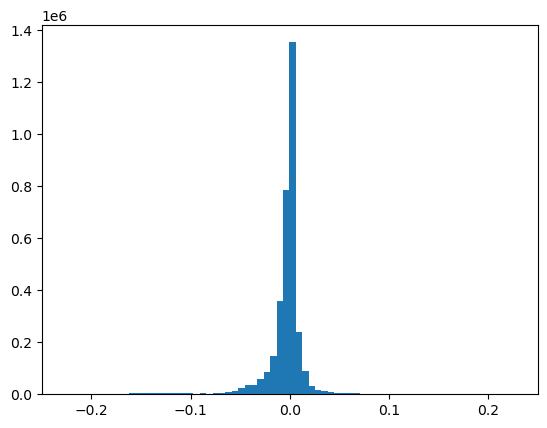

In [13]:
# Plot residuals
plt.hist((adata.layers['reconstructed'] - adata.X).ravel(), bins=1000);
plt.xlim([-.25, .25]);

In [14]:
# Identify cells and genes not trained on (when possible)
adata.layers['prediction'] = adata.layers['reconstructed']
test_genes = np.logical_not(adata.var["train"])
test_cells = np.logical_not(adata.obs["train"])
adata_test = adata[test_cells, test_genes]
sc.tl.dendrogram(adata_test, groupby="label", use_rep="X")


/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [15]:
from rosa.plotting import plot_marker_gene_heatmap

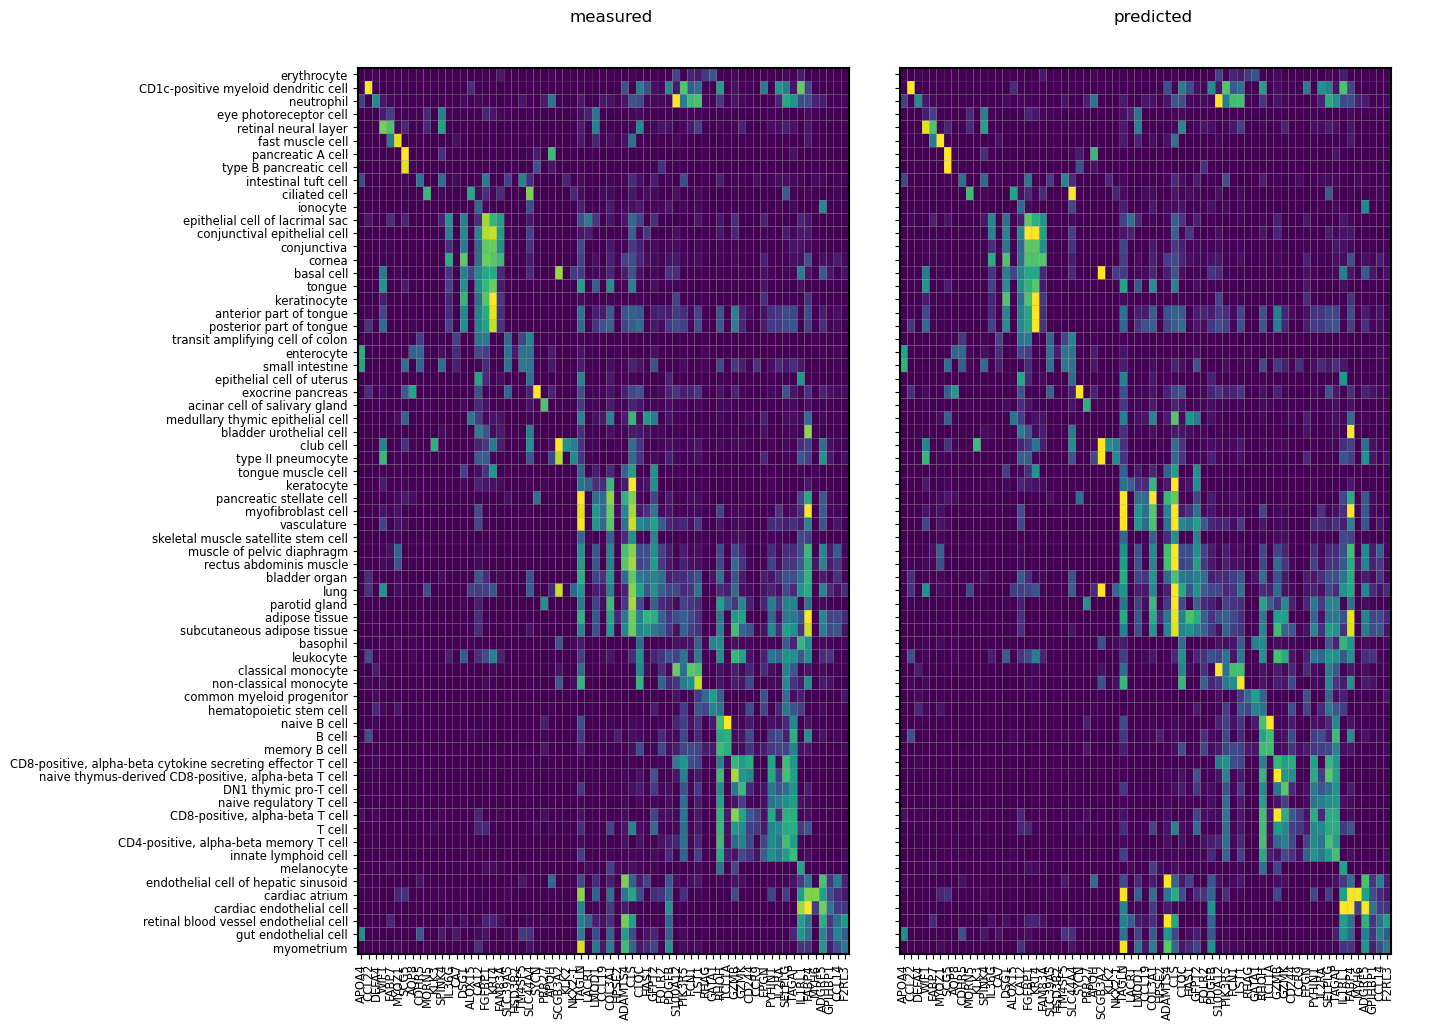

In [16]:
marker_genes_dict = adata_test.obs.set_index('label').to_dict()['marker_feature_name']
plot_marker_gene_heatmap(adata_test, marker_genes_dict)

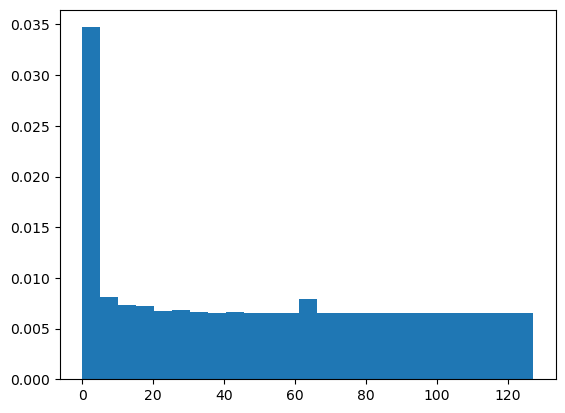

In [17]:
plt.hist(adata.layers['binned'].flatten(), bins=25, density=True);

(0.0, 8.0)

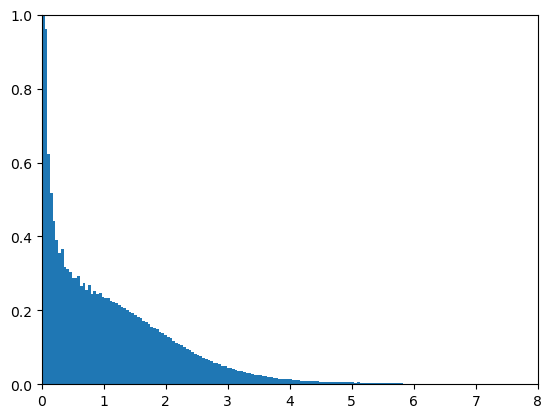

In [22]:
plt.hist(adata.X.flatten(), bins=250, density=True);
plt.ylim([0, 1]);
plt.xlim([0, 8])

In [23]:
adata.X

array([[1.0028871e-01, 1.7204488e-02, 2.8844514e+00, ..., 0.0000000e+00,
        9.1329188e-05, 9.1329188e-05],
       [4.8175342e-02, 2.3381955e-03, 5.0901656e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.7350491e-01, 3.5392204e-03, 7.7790457e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [6.9969028e-02, 3.4976427e-02, 3.4422233e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6527475e-01, 3.0963242e-01, 2.2173800e+00, ..., 1.9011235e-02,
        5.2208295e-03, 0.0000000e+00],
       [7.6532032e-04, 2.5487933e-03, 3.0769660e+00, ..., 5.1027868e-04,
        2.5517188e-04, 0.0000000e+00]], dtype=float32)

In [25]:
from typing import Union

In [31]:
adata.layers['X']

KeyError: 'X'

In [38]:
np.empty((10, 0))[0]

array([], dtype=float64)

In [40]:
from enum import Enum, auto

class EmbeddingType(Enum):
    JOINT = auto()
    VAR = auto()
    OBS = auto()

In [41]:
EmbeddingType.JOINT

<EmbeddingType.JOINT: 1>

In [43]:
list(EmbeddingType.__members__)

['JOINT', 'VAR', 'OBS']

In [ ]:
adata.X = np.ceil(adata.X)
sc.pp.filter_genes(adata, min_cells=1)
sc.experimental.pp.normalize_pearson_residuals(adata)
adata.X[adata.X<0] = 0

In [45]:
2**10

1024

In [46]:
import torch

In [ ]:
np.isinf(adata.X).sum()

In [ ]:
np.isnan(adata.X).sum()

In [ ]:
sc.pp.log1p(adata)

In [ ]:
adata.X

In [51]:
torch.tensor([0])

tensor([0])

In [ ]:
adata.X = np.ceil(adata.X)
adata.layers["counts"] = adata.X.copy()

In [ ]:
sc.pp.filter_genes(adata, min_cells=1)

In [ ]:
sc.pp.filter_cells(adata, min_genes=1)

In [ ]:
adata

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(adata.layers['counts'].sum(axis=1));

In [ ]:
print(adata.layers['counts'].sum(axis=1).mean() / 1e5)
print(adata.layers['counts'].sum(axis=1).var() / 1e10)

In [ ]:
adata.layers["counts_normalized_total"] = adata.X.copy()
sc.pp.normalize_total(adata, 1e5, layer="counts_normalized_total")

In [ ]:
print(adata.layers['counts_normalized_total'].sum(axis=1).mean() / 1e5)
print(adata.layers['counts_normalized_total'].sum(axis=1).var() / 1e10)

In [ ]:
adata.layers["counts_normalized_pearson"] = adata.X.copy()
adata.layers['counts_normalized_pearson'] = np.ceil(adata.layers['counts_normalized_pearson'])
sc.experimental.pp.normalize_pearson_residuals(adata, layer="counts_normalized_pearson", theta=1e2)

In [ ]:
np.isnan(adata.layers['counts_normalized_pearson']).sum()

In [ ]:
print(adata.layers['counts_normalized_pearson'].sum(axis=1).mean())
print(adata.layers['counts_normalized_pearson'].sum(axis=1).var())

In [ ]:
plt.hist(adata.layers['counts_normalized_pearson'].flatten(), np.linspace(0, 100, 1000));

In [ ]:
plt.hist(adata.layers['counts'].flatten(), np.linspace(0, 100, 1000));

In [ ]:
np.log1p(0.1)

In [ ]:
(adata.layers['counts_normalized_pearson'] - adata.layers['counts']).max()

In [ ]:
adata.layers['counts_normalized_pearson'] = np.round(adata.layers['counts_normalized_pearson'])

In [ ]:
np.isnan(adata.layers['counts_normalized_pearson'])[0]

In [ ]:
adata.layers['counts_normalized_pearson'].min()

In [ ]:
adata.uns['pearson_residuals_normalization']

In [ ]:
TABULA_SAPIENS_BY_CELL_TYPE_WITH_EMBEDS_PT = "/Users/nsofroniew/Documents/data/multiomics/cell_census/tabula_sapiens_by_features_with_embeds_new_norm.h5ad"

In [ ]:
adata_norm = ad.read_h5ad(TABULA_SAPIENS_BY_CELL_TYPE_WITH_EMBEDS_PT)

In [ ]:
y = np.exp(adata_norm.X) - 1

In [ ]:
y

In [ ]:
import scanpy as sc

In [ ]:
adata_norm.X = adata_norm.layers['counts'].copy()

In [ ]:
sc.pp.normalize_total(adata_norm, 1e5)

In [ ]:
(abs(adata_norm.X - y)).max()

In [ ]:
# from scipy.special import kl_div

# y_hat = np.asarray(adata[keep_cells].X.flatten())
# y = np.asarray(adata[keep_cells].layers['prediction'].flatten())

# kl_div(y, y_hat).mean()

In [ ]:
from scipy.stats import kstest, poisson

y_hat = np.asarray(adata[keep_cells].X.flatten())
y = np.asarray(adata[keep_cells].layers['prediction'].flatten())

kstest(y_hat, y)

In [ ]:
kstest(y, 'poisson', args=(np.mean(y),))

In [ ]:
from scipy.stats import kstest, poisson

poisson_dist = poisson(np.mean(y))

In [ ]:
y_p = poisson_dist.rvs(size=10000)

In [ ]:
hist, _ = np.histogram(y, bins=bins)
hist_hat, _ = np.histogram(y_hat, bins=bins)
plt.bar(bins[:-1], hist/hist.sum(), width=10/1000)
plt.bar(bins[:-1], hist_hat/hist_hat.sum(), alpha=0.5, width=10/1000)
plt.ylim([0, 1e-2]);
plt.xlim([0, 8]);

In [ ]:
poisson_dist = poisson(np.mean(y))
y_new = poisson_dist.rvs(size=10000)


hist, _ = np.histogram(y, bins=bins)
hist_new, _ = np.histogram(y_new, bins=bins)
plt.bar(bins[:-1], hist/hist.sum(), width=10/1000)
plt.bar(bins[:-1], hist_new//hist_new.sum(), alpha=0.5, width=10/1000)
plt.ylim([0, 1e-2]);
plt.xlim([0, 8]);

In [ ]:
initial_params = [.2, 0.1, 1.2, 0.0.001]

result = minimize(negative_binomial, initial_params, args=(y,), method='Nelder-Mead')

In [ ]:
# Extract the optimal parameters
r1, p1, r2, p2 = result.x
data = y

In [ ]:
from scipy.stats import nbinom

r1, p1, r2, p2 = (0.1, 0.1, 1.1, 0.1)

# nbinom_dist_1 = nbinom(9.1, 0.6)
# nbinom_dist_2 = nbinom(1.2, .001)
y_new = (nbinom.rvs(.2, 0.1, size=10000) + nbinom.rvs(1.2, 0.001, size=10000)) / 1000


hist, _ = np.histogram(y, bins=bins)
hist_new, _ = np.histogram(y_new, bins=bins)
plt.bar(bins[:-1], hist/hist.sum(), width=10/1000)
plt.bar(bins[:-1], hist_new/hist_new.sum(), alpha=0.5, width=10/1000)
plt.ylim([0, 1e-2]);
plt.xlim([0, 8]);

In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import nbinom
import matplotlib.pyplot as plt

# Generate sample data
data = y

# Define the negative binomial function
def negative_binomial(params, data):
    r1, p1, r2, p2 = params
    pmf1 = nbinom.pmf(1000 * data, r1, p1)
    pmf2 = nbinom.pmf(1000 * data, r2, p2)
    return -np.log(pmf1 + pmf2).sum()

# Define the initial values for the parameters
initial_params = (0.1, 0.1, 1.1, 0.1)


# Minimize the negative binomial function using the Nelder-Mead algorithm
result = minimize(negative_binomial, initial_params, args=(data,), method='Nelder-Mead')

# Extract the optimal parameters
r1, p1, r2, p2 = result.x

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')

# Plot the sum of the negative binomials
x = np.arange(0, data.max())
pmf1 = nbinom.pmf(x, r1, p1)
pmf2 = nbinom.pmf(x, r2, p2)
plt.plot(x, pmf1 + pmf2, 'r-', lw=2, label='Sum of Negative Binomials')

plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.show()


In [53]:
try:
  print(x)
except NameError:
  print("Variable x is not defined")

SyntaxError: invalid syntax (147038846.py, line 3)